In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import EntropyHub

# ! pip install EntropyHub

In [58]:
# 生成100行5列的随机数据，确保所有数值大于0.1
imfs = pd.DataFrame(np.random.uniform(low=1, high=10, size=(100, 5)), 
                    columns=['A', 'B', 'C', 'D', 'E'])

# 显示DataFrame
imfs.head()

,A,B,C,D,E
0,9.588110,4.308059,2.684948,8.043529,4.625008
1,5.360650,7.344227,7.789994,5.072804,9.404787
2,1.183067,7.264574,9.250467,1.449271,1.357028
3,4.337298,8.504293,5.276013,9.516568,6.124610
4,9.330682,4.359983,8.137922,9.680599,1.161495


# 近似熵

In [59]:
AE_m1r1, AE_m2r1, AE_m1r2, AE_m2r2 = [], [], [], []
for i in range(len(imfs.columns)): # imfs的个数
    for j in (0.1, 0.2): # r
        for z in (1, 2): # m
            temp_imf = imfs.iloc[:, i].values # 循环每次选取一个子序列
            Approx_entropy = EntropyHub.ApEn(temp_imf, m=z, r=j*np.std(temp_imf))
            if j == 0.1:
                if z == 1:
                    AE_m1r1.append(Approx_entropy[0][-1])
                elif z == 2:
                    AE_m2r1.append(Approx_entropy[0][-1])
            elif j == 0.2:
                if z == 1:
                    AE_m1r2.append(Approx_entropy[0][-1])
                elif z == 2:
                    AE_m2r2.append(Approx_entropy[0][-1])

AE_df = pd.DataFrame(data={
    'm1_r1': AE_m1r1,
    'm2_r1': AE_m2r1,
    'm1_r2': AE_m1r2,
    'm2_r2': AE_m2r2
})
AE_df['avg'] = AE_df.mean(axis=1)
AE_df

,m1_r1,m2_r1,m1_r2,m2_r2,avg
0,1.708688,0.177029,1.714075,0.620059,1.054963
1,1.541771,0.226702,1.710155,0.608377,1.021751
2,1.638559,0.162883,1.768373,0.610441,1.045064
3,1.676636,0.218895,1.754594,0.628637,1.069690
4,1.559945,0.200796,1.750863,0.574770,1.021594


# 样本熵

In [60]:
# 四个变量代表计算熵的四个参数
SE_m1r1, SE_m2r1, SE_m1r2, SE_m2r2 = [], [], [], []
for i in range(len(imfs.columns)):  # imfs的个数
    for j in (0.1, 0.2):   # 熵的参数 r
        for z in (1, 2):   # 熵的参数 m
            temp_imf = imfs.iloc[:, i].values  # 循环每次选取一个子序列
            Sample_entropy = EntropyHub.SampEn(temp_imf, m=z, tau=1, r=j*np.std(temp_imf))
            if j == 0.1:
                if z == 1:
                    SE_m1r1.append(Sample_entropy[0][-1])
                elif z == 2:
                    SE_m2r1.append(Sample_entropy[0][-1])
            elif j == 0.2:
                if z == 1:
                    SE_m1r2.append(Sample_entropy[0][-1])
                elif z == 2:
                    SE_m2r2.append(Sample_entropy[0][-1])
                    
SE_df = pd.DataFrame(data={
    'm1_r1': SE_m1r1,
    'm2_r1': SE_m2r1,
    'm1_r2': SE_m1r2,
    'm2_r2': SE_m2r2
})
SE_df['avg'] = SE_df.mean(axis=1)                          
SE_df

,m1_r1,m2_r1,m1_r2,m2_r2,avg
0,3.075775,2.708050,2.051820,1.704748,2.385098
1,2.557596,3.044522,2.073565,2.549445,2.556282
2,2.958376,2.014903,2.174397,2.335375,2.370763
3,2.785661,2.251292,2.135794,2.022283,2.298758
4,2.700615,2.197225,2.206597,2.285778,2.347554


# 模糊熵

In [61]:
# 四个变量代表计算熵的四个参数
FE_m1r1, FE_m2r1, FE_m1r2, FE_m2r2 = [], [], [], []
for i in range(len(imfs.columns)):  # imfs的个数
    for j in (0.1, 0.2):   # r
        for z in (1, 2):   # m
            temp_imf = imfs.iloc[:, i].values  # 循环每次选取一个子序列
            Fuzzy_entropy = EntropyHub.FuzzEn(temp_imf, m=z, tau=1, r=(j, 2))
            if j == 0.1:
                if z == 1:
                    FE_m1r1.append(Fuzzy_entropy[0][-1])
                elif z == 2:
                    FE_m2r1.append(Fuzzy_entropy[0][-1])
            elif j == 0.2:
                if z == 1:
                    FE_m1r2.append(Fuzzy_entropy[0][-1])
                elif z == 2:
                    FE_m2r2.append(Fuzzy_entropy[0][-1])

FE_df = pd.DataFrame(data={
    'm1_r1': FE_m1r1,
    'm1_r2': FE_m1r2,
    'm2_r1': FE_m2r1,
    'm2_r2': FE_m2r2
})
FE_df['avg'] = FE_df.mean(axis=1)                          
FE_df

,m1_r1,m1_r2,m2_r1,m2_r2,avg
0,2.569437,2.233566,2.645263,2.398941,2.461802
1,2.298607,1.982952,2.505348,2.194539,2.245361
2,2.635768,2.283644,2.594846,2.350653,2.466228
3,2.592965,2.259510,2.880905,2.525779,2.564790
4,2.621076,2.264024,2.879424,2.443190,2.551929


# 排列熵

In [62]:
PE_values = []
for i in range(len(imfs.columns)):
    temp_imf = imfs.iloc[:, i].values
    # m一般为3-7  m越小概率模式较少/m越大计算时间越长
    Permutation_entropy = EntropyHub.PermEn(temp_imf, m=3, tau=1)
    PE_values.append(Permutation_entropy[0][-1])
PE_df = pd.DataFrame(PE_values).T
PE_df

,0,1,2,3,4
0,2.530558,2.495883,2.579052,2.56728,2.580791


# 画图

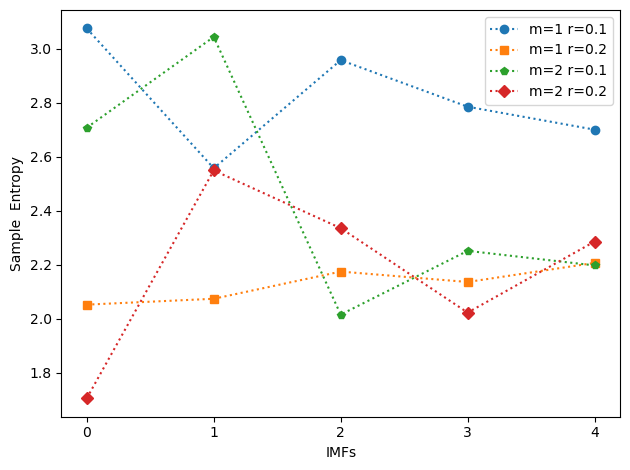

In [63]:
# Plot
x = np.arange(0, len(imfs.columns), 1)  # 横坐标代表imfs的顺序
plt.plot(x, SE_m1r1, linestyle='dotted', marker='o', label='m=1 r=0.1')
plt.plot(x, SE_m1r2, linestyle='dotted', marker='s', label='m=1 r=0.2')
plt.plot(x, SE_m2r1, linestyle='dotted', marker='p', label='m=2 r=0.1')
plt.plot(x, SE_m2r2, linestyle='dotted', marker='D', label='m=2 r=0.2')
plt.xlabel('IMFs')
plt.ylabel('Sample  Entropy')
plt.xticks(x)
plt.legend()
plt.tight_layout()
plt.show()